In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from auxiliar_func import *
from plot_func import *

In [5]:
target = 'income_50k'
df_tr = pd.read_csv('../train.csv')

prep_par, model_par = get_best_params('./results/results_rf.csv')
rf = RandomForestClassifier(**model_par)
df_tr_pre = preprocessing(df_tr, **prep_par)

In [7]:
rf.fit(df_tr_pre.drop(target, axis=1), df_tr_pre[target])

RandomForestClassifier(max_depth=30, n_estimators=125, random_state=42)

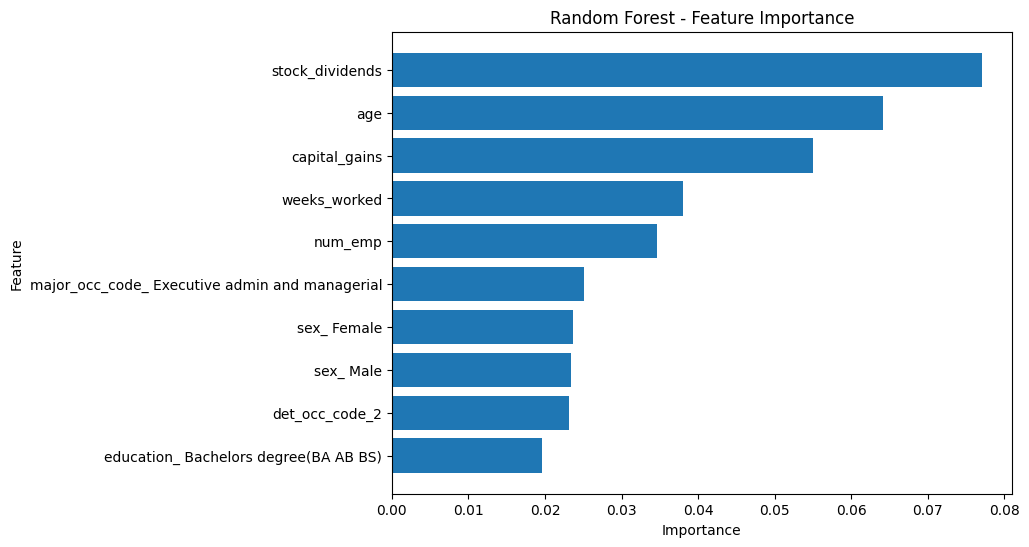

In [21]:
def plot_feature_importance_gini(model, features, model_name, N):
    # plot the N more  feature importance in vertical bar
    feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
    feature_imp = feature_imp[:N]
    feature_imp = feature_imp.sort_values(ascending=True)
    plt.figure(figsize=(8,6))
    plt.title(model_name + ' - Feature Importance')
    plt.ylabel('Feature')
    plt.xlabel('Importance')
    plt.barh(feature_imp.index, feature_imp.values)
    plt.show()

def plot_feature_importance_perm(model, X, y, features, model_name, N):
    from sklearn.inspection import permutation_importance
    # plot the N more  feature importance in vertical bar
    feature_imp = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    feature_imp = pd.Series(feature_imp.importances_mean,index=features).sort_values(ascending=False)
    feature_imp = feature_imp[:N]
    feature_imp = feature_imp.sort_values(ascending=True)
    plt.figure(figsize=(8,6))
    plt.title(model_name + ' - Feature Importance')
    plt.ylabel('Feature')
    plt.xlabel('Importance')
    plt.barh(feature_imp.index, feature_imp.values)
    plt.show()


plot_feature_importance_gini(rf, df_tr_pre.drop(target, axis=1).columns, 'Random Forest', 10)
plot_feature_importance_perm(rf, df_tr_pre.drop(target, axis=1), df_tr_pre[target], df_tr_pre.drop(target, axis=1).columns, 'Random Forest', 10)